# 입문자를 위한, 파이썬/R 데이터 분석   

]

## Today's mission

- (고급분석) 타이타닉호의 생존자 가려내기

]

# (고급분석) 타이타닉호의 생존자 가려내기

Copyright (c) 2019 [윤기태]

https://github.com/yoonkt200/python-data-analysis

[MIT License](https://github.com/yoonkt200/python-data-analysis/blob/master/LICENSE.txt)

### 바로가기

- [<Step1. 탐색> : Titanic 데이터 살펴보기](#<Step1.-탐색>-:-Titanic-데이터-살펴보기)
    - [Titanic 데이터셋의 기본 정보]
    - [탐색적 데이터 분석]
- [<Step2. 분류> : 생존자 분류 모델 만들기](#<Step2.-분류>-:-생존자-분류-모델-만들기)
    - [분류 모델을 위한 전처리]
    - [분류 모델링]
- [<Step3. 모델 개선> : 피처 엔지니어링 첫걸음](#<Step3.-모델-개선>-:-피처-엔지니어링-첫걸음)
    - [피처에서 새로운 의미 추출해내기]
    - [피처 스케일링]
    - [피처 영향력 살펴보기]
- [<Step4. 평가> : 모델 검증하기](#<Step4.-평가>-:-모델-검증하기)
    - [K-fold 교차 검증 수행하기]
    - [학습 곡선 분석하기]

In [1]:
# -*- coding: utf-8 -*-
#%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

# <Step1. 탐색> : Titanic 데이터 살펴보기

### [Titanic 데이터셋의 기본 정보]

##### 데이터 피처 설명
- pclass : Passenger Class, 승객 등급
- survived : 생존 여부
- name : 승객 이름
- sex : 승객 성별
- age : 승객 나이
- sibsp : 탑승 한 형제/배우자 수
- parch : 탑승 한 부모/자녀 수
- ticket : 티켓 번호
- fare : 승객 지불 요금
- cabin : 선실 이름
- embarked : 승선항 (C = 쉘 부르그, Q = 퀸즈타운, S = 사우스 햄튼)
- body : 사망자 확인 번호
- home.dest : 고향/목적지

##### 도메인 지식 :  [타이타닉 침몰사고](https://ko.wikipedia.org/wiki/RMS_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89)

​ 타이타닉 생존자 분석하기에 앞서 도움을 주는 도메인지식이 있다. 간단하게 요약해보자 한다.

- 1912년 시대적 배경에는 “Lady First”라는 개념이 존재 했다. 
- 어린이와 여자부터 우선적으로 구조 했다고 한다. 
- “Lady First”라는 개념이 없었다면 급박한 상황에서 구명정으로 달려들때 힘센 남성이 구명정을 차지할 가능성이 높아 생존에 유리했을 것이다.
- 타이타닉호에는 쉽게말해 사회적위치가 높은 사람, 부자, 일반인, 가난한 이민자 등 여러 부류 사람들이 있었고, 객실도 1등실~3등실이 있었다.
- 3등실은 여러 구역이 철창으로 막혀 제한되어 있었고 배가 미로처럼 복잡했기 때문에 탈출에 지장을 빚었으며, 3등실은 승객들 중에는 영어를 잘 하지 못하는 승객들도 많았다

In [4]:
df_train = pd.read_csv("data_titanic_adv/titanic_train.csv")
df_test = pd.read_csv("data_titanic_adv/titanic_test.csv")

In [5]:
df_train.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,916.000000,916.000000,741.000000,916.000000,916.000000,916.000000,85.000000
mean,2.292576,0.385371,30.231444,0.532751,0.371179,32.532050,157.870588
std,0.842576,0.486949,13.934240,1.125957,0.837508,47.416524,98.257653
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,68.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,148.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,249.000000
max,3.000000,1.000000,74.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
df_test.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,393.000000,393.000000,305.000000,393.000000,393.000000,393.000000,36.00000
mean,2.300254,0.374046,29.030066,0.419847,0.417303,35.051854,167.75000
std,0.827724,0.484492,15.507318,0.807688,0.927970,60.662100,97.38154
min,1.000000,0.000000,0.330000,0.000000,0.000000,0.000000,18.00000
25%,2.000000,0.000000,19.000000,0.000000,0.000000,7.925000,79.50000
50%,3.000000,0.000000,27.000000,0.000000,0.000000,15.000000,169.00000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,30.500000,263.00000
max,3.000000,1.000000,80.000000,5.000000,9.000000,512.329200,327.00000


In [7]:
df_train.tail(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
911,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S,NaN,"Devon, England Wichita, KS"
912,3,0,"Guest, Mr. Robert",male,NaN,0,0,376563,8.0500,NaN,S,NaN,NaN
913,3,1,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,NaN,NaN
914,2,1,"Sincock, Miss. Maude",female,20.00,0,0,C.A. 33112,36.7500,NaN,S,NaN,"Cornwall / Hancock, MI"
915,3,0,"Bourke, Mrs. John (Catherine)",female,32.00,1,1,364849,15.5000,NaN,Q,NaN,"Ireland Chicago, IL"


In [8]:
df_test.tail(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
388,3,0,"Karlsson, Mr. Julius Konrad Eugen",male,33.0,0,0,347465,7.8542,NaN,S,NaN,NaN
389,2,1,"Ware, Mrs. John James (Florence Louise Long)",female,31.0,0,0,CA 31352,21.0000,NaN,S,NaN,"Bristol, England / New Britain, CT"
390,3,1,"O'Keefe, Mr. Patrick",male,NaN,0,0,368402,7.7500,NaN,Q,NaN,NaN
391,3,0,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q,NaN,NaN
392,1,1,"Daniels, Miss. Sarah",female,33.0,0,0,113781,151.5500,NaN,S,NaN,NaN


In [9]:
print(df_train.info())
print("---------------------------------")
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB
None
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pcl

In [10]:
df_train['body'].unique()

array([ nan,  97., 285., 304., 294., 130., 292., 259., 142., 133., 197.,
       230., 307., 110., 232., 189.,  38., 131., 263., 297., 255.,  96.,
       236., 312.,  61., 305., 309.,  16.,  80., 298., 147.,   7.,  14.,
         9., 295., 101., 190., 293., 249.,  15.,  45., 314.,  62., 287.,
       260., 173.,   4.,  53., 109., 135.,  98.,  37., 188.,  51., 245.,
        52., 120., 156.,  79., 209., 234.,  32., 126., 207.,   1.,  35.,
        58., 171.,  46., 328., 148., 149., 121., 119., 169., 175.,  17.,
       143., 181., 174., 275.,  67.,  68.,  69., 153., 258.])

In [11]:
sorted(df_train['body'].unique())

[nan,
 1.0,
 4.0,
 7.0,
 9.0,
 14.0,
 15.0,
 16.0,
 17.0,
 32.0,
 35.0,
 37.0,
 38.0,
 45.0,
 46.0,
 51.0,
 52.0,
 53.0,
 58.0,
 61.0,
 62.0,
 67.0,
 68.0,
 69.0,
 79.0,
 80.0,
 96.0,
 97.0,
 98.0,
 101.0,
 109.0,
 110.0,
 119.0,
 120.0,
 121.0,
 126.0,
 130.0,
 131.0,
 133.0,
 135.0,
 142.0,
 143.0,
 147.0,
 148.0,
 149.0,
 153.0,
 156.0,
 169.0,
 171.0,
 173.0,
 174.0,
 175.0,
 181.0,
 188.0,
 189.0,
 190.0,
 197.0,
 207.0,
 209.0,
 230.0,
 232.0,
 234.0,
 236.0,
 245.0,
 249.0,
 255.0,
 258.0,
 259.0,
 260.0,
 263.0,
 275.0,
 285.0,
 287.0,
 292.0,
 293.0,
 294.0,
 295.0,
 297.0,
 298.0,
 304.0,
 305.0,
 307.0,
 309.0,
 312.0,
 314.0,
 328.0]

##### 불필요한 피처 제거

In [12]:
# 데이터셋에서 name, ticket, body, cabin, home.dest 피처를 제거합니다.
df_train = df_train.drop(['name', 'ticket', 'body', 'cabin', 'home.dest'], axis=1)
df_test = df_test.drop(['name', 'ticket', 'body', 'cabin', 'home.dest'], axis=1)

### [탐색적 데이터 분석(EDA)]

In [13]:
df_train['survived'].value_counts()

0    563
1    353
Name: survived, dtype: int64

<AxesSubplot:>

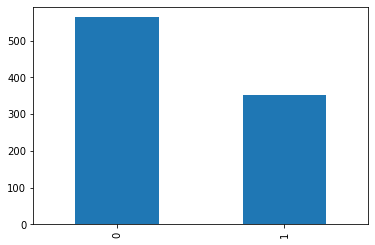

In [14]:
df_train['survived'].value_counts().plot.bar()

In [15]:
a_test = df_train['survived'].value_counts() / len(df_train['survived']) * 100
a_test

0    61.462882
1    38.537118
Name: survived, dtype: float64

In [16]:
# survived 피처를 기준으로 그룹을 나누어, 그룹별 pclass 피처의 분포를 살펴봅니다.
df_train['pclass'].value_counts()

3    498
1    230
2    188
Name: pclass, dtype: int64

In [17]:
df_train.groupby(['pclass', 'survived'])['survived'].count() / len(df_train) * 100

pclass  survived
1       0            9.606987
        1           15.502183
2       0           11.572052
        1            8.951965
3       0           40.283843
        1           14.082969
Name: survived, dtype: float64

In [18]:
df_train.groupby(['pclass', 'survived'])['survived'].count() / len(df_train) * 100

pclass  survived
1       0            9.606987
        1           15.502183
2       0           11.572052
        1            8.951965
3       0           40.283843
        1           14.082969
Name: survived, dtype: float64

In [19]:
pd.pivot_table(df_train, 'survived', columns='pclass')

pclass,1,2,3
survived,0.617391,0.43617,0.259036


In [20]:
pivot_table = pd.pivot_table(df_train, 
                             index='pclass', 
                             columns='survived', 
                             aggfunc='size', )

pivot_table = (pivot_table / len(df_train)) * 100

pivot_table

survived,0,1
pclass,,
1,9.606987,15.502183
2,11.572052,8.951965
3,40.283843,14.082969


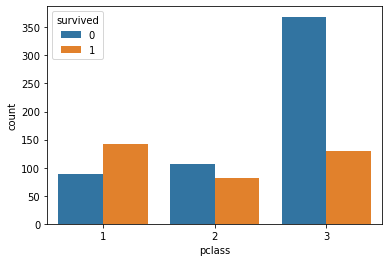

In [21]:
ax = sns.countplot(x='pclass', hue = 'survived', data = df_train)

<AxesSubplot:xlabel='pclass', ylabel='count'>

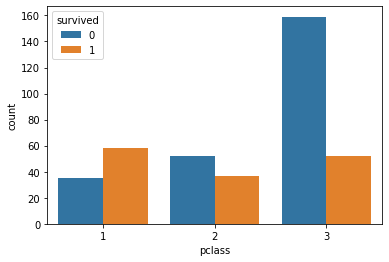

In [22]:
sns.countplot(x='pclass', hue='survived', data=df_test)

In [23]:
df_train.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [24]:
from scipy import stats

# 두 집단의 피처를 비교해주며 탐색작업을 자동화하는 함수를 정의합니다.
def valid_features(df, col_name, distribution_check=True):
    
    # 두 집단 (survived=1, survived=0)의 분포 그래프를 출력합니다.
    g = sns.FacetGrid(df, col='survived')
    g.map(plt.hist, col_name, bins=30)

    # 두 집단 (survived=1, survived=0)의 표준편차를 각각 출력합니다.
    titanic_survived = df[df['survived']==1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    print("data std is", '%.2f' % np.std(titanic_survived_static))
    titanic_n_survived = df[df['survived']==0]
    titanic_n_survived_static = np.array(titanic_n_survived[col_name])
    print("data std is", '%.2f' % np.std(titanic_n_survived_static))
    
     # T-test로 두 집단의 평균 차이를 검정합니다. (타겟 구분)
    tTestResult = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name])
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name], equal_var=False)
    print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
    print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)
    
    if distribution_check:
        # Shapiro-Wilk 검정 : 주어진 데이터가 얼마나 정규성을 따르는지 측정하는 검정 방법.(전체 데이터)
        print("The w-statistic and p-value in Survived %.3f and %.3f" % stats.shapiro(titanic_survived[col_name]))
        print("The w-statistic and p-value in Non-Survived %.3f and %.3f" % stats.shapiro(titanic_n_survived[col_name]))

- 참고 : T-test 검정 : https://brunch.co.kr/@jihoonleeh9l6/33

- 참고 : 편차, 분산, 표준편차 : https://ko.wikipedia.org/wiki/%ED%91%9C%EC%A4%80_%ED%8E%B8%EC%B0%A8

In [25]:
df_train[df_train['age'] > 0]['age'].unique()

array([13.  ,  4.  , 30.  , 22.  ,  2.  , 49.  , 35.  , 42.  , 18.  ,
       28.  , 25.  , 24.  ,  0.75, 33.  , 26.  , 20.  , 32.  , 31.  ,
       26.5 , 41.  ,  1.  , 18.5 , 52.  , 21.  , 46.  , 62.  , 23.  ,
       38.  , 16.  , 36.  , 51.  , 40.  , 45.  , 48.  , 39.  , 19.  ,
       56.  , 27.  , 14.  , 11.  , 34.  , 61.  , 54.  , 44.  , 55.  ,
       64.  , 12.  , 43.  , 28.5 , 29.  , 15.  , 37.  , 50.  , 63.  ,
       58.  , 47.  , 60.  , 40.5 , 59.  ,  3.  , 67.  , 53.  , 45.5 ,
       30.5 , 36.5 ,  8.  , 17.  ,  9.  , 32.5 , 22.5 , 65.  , 71.  ,
        5.  , 23.5 , 57.  ,  6.  , 74.  , 38.5 , 11.5 , 70.5 , 14.5 ,
       10.  , 66.  ,  0.83,  7.  ,  0.17])

data std is 14.22
data std is 13.71
The t-statistic and p-value assuming equal variances is -0.546 and 0.585.
The t-statistic and p-value not assuming equal variances is -0.543 and 0.587
The w-statistic and p-value in Survived 0.982 and 0.001
The w-statistic and p-value in Non-Survived 0.968 and 0.000


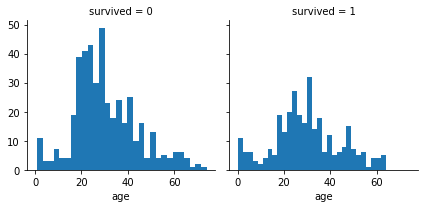

In [26]:
# 앞서 정의한 valid_features 함수를 실행합니다. age 피처를 탐색합니다.
# p-value가 0.5 이상이므로 이 두 집단은 거의 차이가 없다
# w통계량의 p-value가 낮으므로 정규성을 따른다
valid_features(df_train[df_train['age'] > 0], 'age', distribution_check=True)

data std is 0.64
data std is 1.34
The t-statistic and p-value assuming equal variances is -2.118 and 0.034.
The t-statistic and p-value not assuming equal variances is -2.446 and 0.015
The w-statistic and p-value in Survived 0.656 and 0.000
The w-statistic and p-value in Non-Survived 0.492 and 0.000


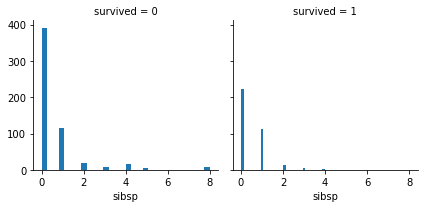

In [27]:
# 앞서 정의한 valid_features 함수를 실행합니다. sibsp 피처를 탐색합니다.
valid_features(df_train, 'sibsp', distribution_check=True)

data std is 0.88
data std is 0.75
The t-statistic and p-value assuming equal variances is -9.848 and 0.000.
The t-statistic and p-value not assuming equal variances is -9.507 and 0.000
The w-statistic and p-value in Survived 0.759 and 0.000
The w-statistic and p-value in Non-Survived 0.657 and 0.000


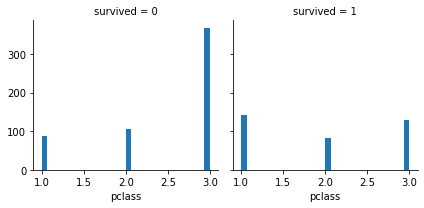

In [28]:
# 앞서 정의한 valid_features 함수를 실행합니다. sibsp 피처를 탐색합니다.
valid_features(df_train, 'pclass', distribution_check=True)

### `[미니 퀴즈 - 4.1]`
- `parch, fare, sex, embarked 피처에 대해 (생존자/비생존자) 간의 차이를 탐색해 보세요.` 
    - 위에서와 동일한 방법를 이용하여 생존자와 비생존자 그룹간의 평균과 분포가 어떻게 다른지, 혹은 통계적 유의성이 얼마나 있는지 대해 살펴보도록 합시다.
        - sex : 남/여에서 생존자와 비생존자간의 비율이 크게 다른것을 확인할 수 있습니다.
        - embarked : 3개의 승선항에 따라 생존자와 비생존자간의 비율이 부분적으로 다른것을 확인할 수 있습니다.
        - parch : 편차에 약간 차이가 있고, t-test 결과 두 집단의 평균에도 약간의 차이가 있다는 것을 알 수 있습니다.
        - fare : 편차에 많은 차이가 있고, t-test 결과 두 집단의 평균은 다르다고 확신할 수 있습니다.

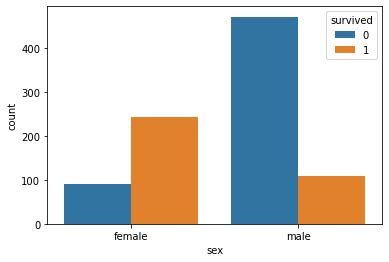

In [29]:
ax = sns.countplot(x='sex', hue = 'survived',  data = df_train)

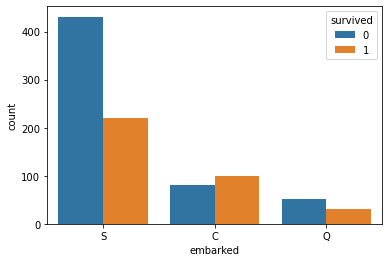

In [30]:
ax = sns.countplot(x='embarked', hue = 'survived',  data = df_train)

data std is 0.74
data std is 0.89
The t-statistic and p-value assuming equal variances is 1.865 and 0.063.
The t-statistic and p-value not assuming equal variances is 1.942 and 0.052
The w-statistic and p-value in Survived 0.630 and 0.000
The w-statistic and p-value in Non-Survived 0.421 and 0.000


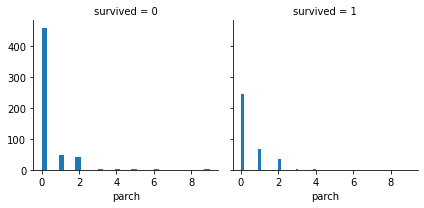

In [31]:
valid_features(df_train, 'parch', distribution_check=True)

data std is 60.68
data std is 33.65
The t-statistic and p-value assuming equal variances is 7.523 and 0.000.
The t-statistic and p-value not assuming equal variances is 6.657 and 0.000
The w-statistic and p-value in Survived 0.660 and 0.000
The w-statistic and p-value in Non-Survived 0.520 and 0.000


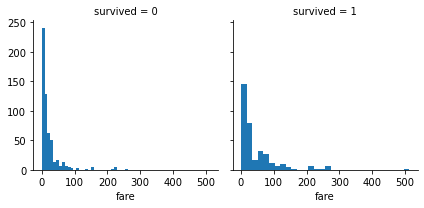

In [32]:
valid_features(df_train, 'fare', distribution_check=True)

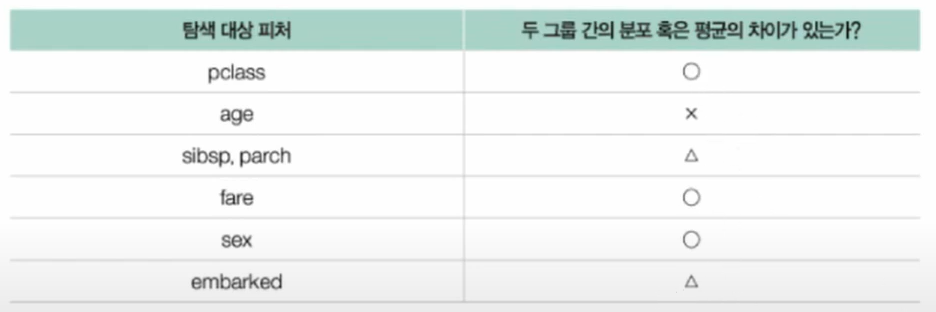

# <Step2. 분류> : 생존자 분류 모델 만들기

### [분류 모델을 위한 전처리]

In [33]:
df_train.describe()

,pclass,survived,age,sibsp,parch,fare
count,916.000000,916.000000,741.000000,916.000000,916.000000,916.000000
mean,2.292576,0.385371,30.231444,0.532751,0.371179,32.532050
std,0.842576,0.486949,13.934240,1.125957,0.837508,47.416524
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,74.000000,8.000000,9.000000,512.329200


In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    916 non-null    int64  
 1   survived  916 non-null    int64  
 2   sex       916 non-null    object 
 3   age       741 non-null    float64
 4   sibsp     916 non-null    int64  
 5   parch     916 non-null    int64  
 6   fare      916 non-null    float64
 7   embarked  914 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 57.4+ KB


In [35]:
# age의 결측값을 평균값으로 대체합니다.
replace_mean = df_train[df_train['age'] > 0]['age'].mean()

In [36]:
df_train['age'] = df_train['age'].fillna(replace_mean)

In [37]:
df_test['age'] = df_test['age'].fillna(replace_mean)

In [38]:
df_train['embarked'].value_counts()

S    652
C    179
Q     83
Name: embarked, dtype: int64

In [39]:
df_train['embarked'].value_counts().index[0]

'S'

In [40]:
# embark : 2개의 결측값을 최빈값으로 대체합니다.
embarked_mode = df_train['embarked'].value_counts().index[0]
embarked_mode

'S'

In [41]:
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)

In [42]:
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

In [43]:
# one-hot encoding을 위한 통합 데이터 프레임(whole_df)을 생성합니다.
whole_df = df_train.append(df_test)
whole_df

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,2,1,female,13.000000,0,1,19.5000,S
1,2,1,female,4.000000,1,1,23.0000,S
2,2,1,female,30.000000,1,0,13.8583,C
3,3,0,male,30.231444,0,0,7.7250,Q
4,3,1,female,22.000000,0,0,7.7250,Q
...,...,...,...,...,...,...,...,...
388,3,0,male,33.000000,0,0,7.8542,S
389,2,1,female,31.000000,0,0,21.0000,S
390,3,1,male,30.231444,0,0,7.7500,Q
391,3,0,male,30.231444,0,0,7.7500,Q


In [44]:
train_idx_num = len(df_train)
train_idx_num

916

In [45]:
whole_df.iloc[915:918]

,pclass,survived,sex,age,sibsp,parch,fare,embarked
915,3,0,female,32.0,1,1,15.5000,Q
0,3,0,male,38.0,0,0,7.8958,S
1,2,1,female,21.0,0,1,21.0000,S


In [46]:
# pandas 패키지를 이용한 one-hot 인코딩을 수행합니다.
whole_df_encoded = pd.get_dummies(whole_df)
whole_df_encoded

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,1,0,0,0,1
1,2,1,4.000000,1,1,23.0000,1,0,0,0,1
2,2,1,30.000000,1,0,13.8583,1,0,1,0,0
3,3,0,30.231444,0,0,7.7250,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
388,3,0,33.000000,0,0,7.8542,0,1,0,0,1
389,2,1,31.000000,0,0,21.0000,1,0,0,0,1
390,3,1,30.231444,0,0,7.7500,0,1,0,1,0
391,3,0,30.231444,0,0,7.7500,0,1,0,1,0


In [47]:
df_train = whole_df_encoded[:train_idx_num]

In [48]:
df_test = whole_df_encoded[train_idx_num:]

In [49]:
df_train.tail()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
911,3,1,0.170000,1,2,20.5750,1,0,0,0,1
912,3,0,30.231444,0,0,8.0500,0,1,0,0,1
913,3,1,30.231444,0,0,7.7333,1,0,0,1,0
914,2,1,20.000000,0,0,36.7500,1,0,0,0,1
915,3,0,32.000000,1,1,15.5000,1,0,0,1,0


In [50]:
df_test.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,0,38.000000,0,0,7.8958,0,1,0,0,1
1,2,1,21.000000,0,1,21.0000,1,0,0,0,1
2,2,0,42.000000,1,0,27.0000,0,1,0,0,1
3,3,0,30.231444,0,0,14.5000,0,1,0,0,1
4,2,0,25.000000,0,0,31.5000,0,1,0,0,1


In [51]:
df_train['survived'].values  ### y_train --> y_test

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,

In [52]:
df_train.loc[:, df_train.columns != 'survived'].values  ### x_train --> x_test

array([[ 2.        , 13.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.        ,  4.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.        , 30.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 3.        , 30.23144399,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 2.        , 20.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        , 32.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ]])

In [53]:
df_train.loc[:, df_train.columns != 'survived'].head(5)

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,13.000000,0,1,19.5000,1,0,0,0,1
1,2,4.000000,1,1,23.0000,1,0,0,0,1
2,2,30.000000,1,0,13.8583,1,0,1,0,0
3,3,30.231444,0,0,7.7250,0,1,0,1,0
4,3,22.000000,0,0,7.7250,1,0,0,1,0


- list vs array :  https://jimmy-ai.tistory.com/90

In [54]:
# 데이터를 학습 데이터셋, 테스트 데이터셋으로 분리합니다.
x_train, y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values

In [55]:
x_train

array([[ 2.        , 13.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.        ,  4.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.        , 30.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 3.        , 30.23144399,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 2.        , 20.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        , 32.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ]])

In [56]:
y_train

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,

In [57]:
x_test, y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values

In [58]:
y_test

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,

In [59]:
df_train.loc[:, df_train.columns != 'survived']

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,13.000000,0,1,19.5000,1,0,0,0,1
1,2,4.000000,1,1,23.0000,1,0,0,0,1
2,2,30.000000,1,0,13.8583,1,0,1,0,0
3,3,30.231444,0,0,7.7250,0,1,0,1,0
4,3,22.000000,0,0,7.7250,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
911,3,0.170000,1,2,20.5750,1,0,0,0,1
912,3,30.231444,0,0,8.0500,0,1,0,0,1
913,3,30.231444,0,0,7.7333,1,0,0,1,0
914,2,20.000000,0,0,36.7500,1,0,0,0,1


### [분류 모델링]

##### Logistic Regression

- 참고 : https://bluenoa.tistory.com/48

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [61]:
# 로지스틱 회귀 모델을 학습합니다.
lr = LogisticRegression(random_state=0)

In [62]:
lr

LogisticRegression(random_state=0)

In [63]:
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [64]:
# 학습한 모델의 테스트 데이터셋에 대한 예측 결과를 반환합니다.
y_pred = lr.predict(x_test)
y_pred[:10] # 예측값

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [65]:
y_test[:10] # 정답

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [66]:
lr.predict_proba(x_test)[:,1]

array([0.08321233, 0.83053806, 0.120867  , 0.10316504, 0.24841059,
       0.69857716, 0.28677744, 0.26362331, 0.11143641, 0.10269442,
       0.33244078, 0.14040505, 0.32250365, 0.68237997, 0.92643888,
       0.25085776, 0.62512004, 0.47754269, 0.8835417 , 0.09532785,
       0.12754362, 0.04467182, 0.10897052, 0.91803038, 0.23015656,
       0.7185741 , 0.27990436, 0.15046731, 0.12668621, 0.70732558,
       0.85613738, 0.96205727, 0.81369247, 0.30259359, 0.7755844 ,
       0.1026549 , 0.09531724, 0.4259823 , 0.16948647, 0.12112085,
       0.10263102, 0.12171223, 0.3723392 , 0.30823536, 0.5468292 ,
       0.06022978, 0.152233  , 0.91470373, 0.3363039 , 0.10273854,
       0.84302874, 0.10267788, 0.12110776, 0.62792278, 0.11491395,
       0.10268982, 0.90064266, 0.43580234, 0.70577228, 0.90561319,
       0.13453807, 0.30541924, 0.49665172, 0.22491525, 0.54868428,
       0.78683318, 0.25123284, 0.16948647, 0.13096033, 0.72994175,
       0.79768447, 0.09024138, 0.40650031, 0.05801574, 0.65236

In [67]:
y_pred_probability = lr.predict_proba(x_test)[:,1]

##### 분류 모델 평가

In [68]:
# 테스트 데이터셋에 대한 accuracy, precision, recall, f1 평가 지표를 각각 출력합니다.
print("accuracy: %.2f" % accuracy_score(y_test, y_pred)) 
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.80
Precision : 0.756
Recall : 0.673
F1 : 0.712


##### 분류 모델의 여러가지 평가 방법들 (  P : 1 , 생존 / N : 0, 사망 )

![confusion matrix](https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png)

- [Confusion Matrix](https://frhyme.github.io/machine-learning/clf_%ED%8F%89%EA%B0%80%ED%95%98%EA%B8%B0/) 기반
    - Accuracy (정확도) : TP+TN / TP+TN+FP+FN
    - Precision (정밀도) : TP / TP+FP
    - Recall (재현도) : TP / TP+FN
    - F1 score : 정밀도와 재현도의 조화 평균값
    - Specificity 특이도 : TN / TN+FP
    - [ROC (Receiver Operating Characteristic) curve](https://angeloyeo.github.io/2020/08/05/ROC.html) : 재현도(민감도)와 특이도를 고려 종합적인 모델 성능(TPR은 높고, FPR이 낮은 경우가 분류가 정확하게 이루어지고 있다는 의미)
    - AUC (Area Under the Curve) : ROC 그래프의 넓이를 계산 성능지표, 1에 가까울수록 좋은 분류 모델

In [69]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix를 출력합니다.
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[214  32]
 [ 48  99]]


##### Logistic Regression model AUC

-----

AUC : 0.838


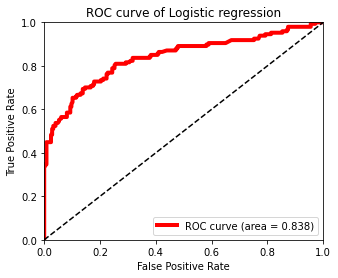

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score

# AUC (Area Under the Curve)를 계산하여 출력합니다.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve를 그래프로 출력합니다.
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

-----

##### Decision Tree

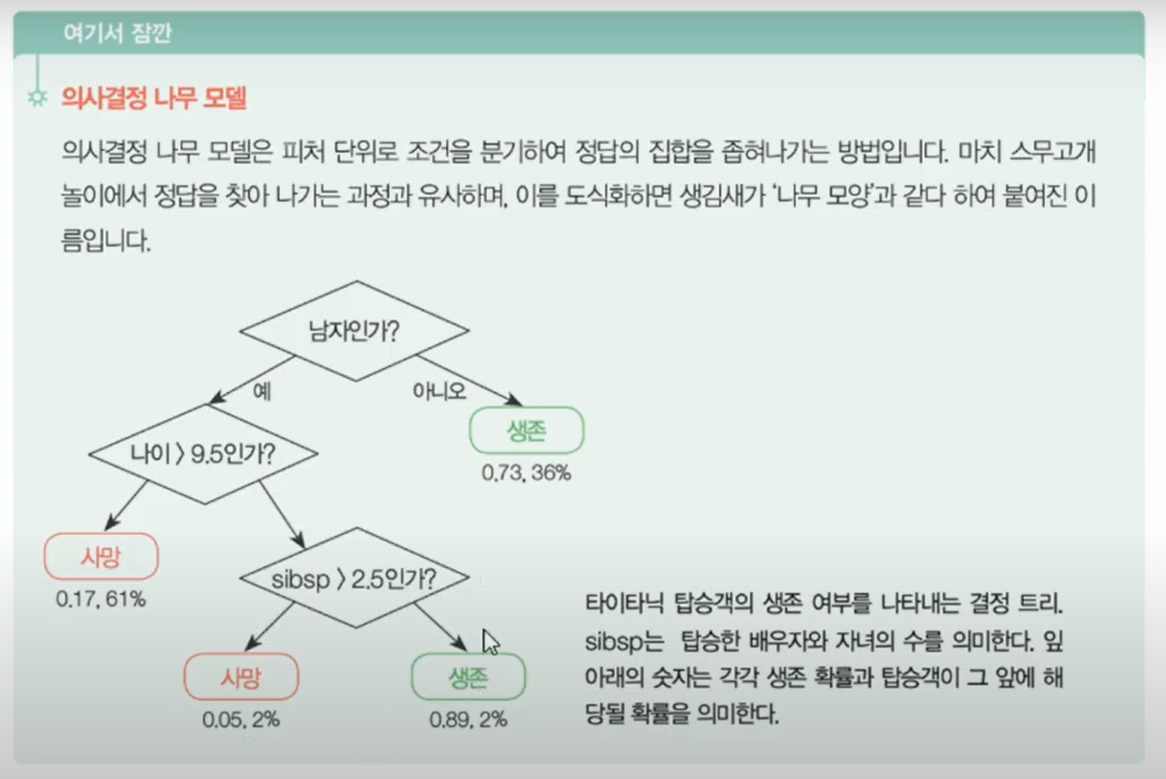

In [194]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
# 의사결정나무를 학습하고, 학습한 모델로 테스트 데이터셋에 대한 예측값을 반환합니다.
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
y_pred_probability = dtc.predict_proba(x_test)[:,1]

In [73]:
y_pred[:10]

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [74]:
y_pred_probability[:10]

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])

In [75]:
# 학습한 모델의 성능을 계산하여 출력합니다.
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.74
Precision : 0.664
Recall : 0.633
F1 : 0.648


AUC : 0.735


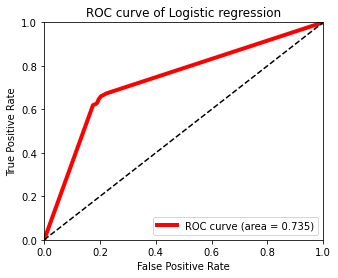

In [76]:
# 학습한 모델의 AUC를 계산하여 출력합니다.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve를 그래프로 출력합니다.
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

# <Step3. 모델 개선> : 피처 엔지니어링 첫걸음

### [피처에서 새로운 의미 추출해내기]

In [77]:
# 데이터를 다시 불러옵니다.
df_train = pd.read_csv("data_titanic_adv/titanic_train.csv")
df_test = pd.read_csv("data_titanic_adv/titanic_test.csv")
df_train = df_train.drop(['ticket', 'body', 'home.dest'], axis=1)
df_test = df_test.drop(['ticket', 'body', 'home.dest'], axis=1)

In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    916 non-null    int64  
 1   survived  916 non-null    int64  
 2   name      916 non-null    object 
 3   sex       916 non-null    object 
 4   age       741 non-null    float64
 5   sibsp     916 non-null    int64  
 6   parch     916 non-null    int64  
 7   fare      916 non-null    float64
 8   cabin     214 non-null    object 
 9   embarked  914 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 71.7+ KB


In [79]:
# age의 결측값을 평균값으로 대체합니다.
replace_mean = df_train[df_train['age'] > 0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

In [80]:
# embark : 2개의 결측값을 최빈값으로 대체합니다.
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

In [81]:
# one-hot encoding을 위한 통합 데이터 프레임(whole_df)을 생성합니다.
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)

##### cabin 피처 활용하기

In [82]:
whole_df['cabin'].value_counts()[:10]

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F4                 4
B96 B98            4
F33                4
C78                4
D                  4
F2                 4
C22 C26            4
Name: cabin, dtype: int64

In [83]:
whole_df['cabin'].unique()

array([nan, 'E36', 'C68', 'E24', 'C22 C26', 'D38', 'B50', 'A24', 'C111',
       'F', 'C6', 'C87', 'E8', 'B45', 'C93', 'D28', 'D36', 'C125', 'B35',
       'T', 'B73', 'B57 B59 B63 B66', 'A26', 'A18', 'B96 B98', 'G6',
       'C78', 'C101', 'D9', 'D33', 'C128', 'E50', 'B26', 'B69', 'E121',
       'C123', 'B94', 'A34', 'D', 'C39', 'D43', 'E31', 'B5', 'D17', 'F33',
       'E44', 'D7', 'A21', 'D34', 'A29', 'D35', 'A11', 'B51 B53 B55',
       'D46', 'E60', 'C30', 'D26', 'E68', 'A9', 'B71', 'D37', 'F2',
       'C55 C57', 'C89', 'C124', 'C23 C25 C27', 'C126', 'E49', 'F E46',
       'E46', 'D19', 'B58 B60', 'C82', 'B52 B54 B56', 'C92', 'E45',
       'F G73', 'C65', 'E25', 'B3', 'D40', 'C91', 'B102', 'B61', 'F G63',
       'A20', 'B36', 'C7', 'B77', 'D20', 'C148', 'C105', 'E38', 'B86',
       'C132', 'C86', 'A14', 'C54', 'A5', 'B49', 'B28', 'B24', 'C2', 'F4',
       'A6', 'C83', 'B42', 'A36', 'C52', 'D56', 'C116', 'B19', 'E77',
       'F E57', 'E101', 'B18', 'C95', 'D15', 'E33', 'B30', 'D21', 'E1

In [84]:
# 결측 데이터의 경우는 ‘X’로 대체합니다.
whole_df['cabin'] = whole_df['cabin'].fillna('X')

In [85]:
# cabin 피처의 첫 번째 문자를 추출합니다.
whole_df['cabin'] = whole_df['cabin'].apply(lambda x: x[0])

In [86]:
whole_df['cabin'].value_counts()

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin, dtype: int64

In [87]:
# 추출한 문자 중, G와 T는 수가 너무 작기 때문에, 마찬가지로 ‘X’로 대체합니다.
whole_df['cabin'] = whole_df['cabin'].replace({"G":"X", "T":"X"})

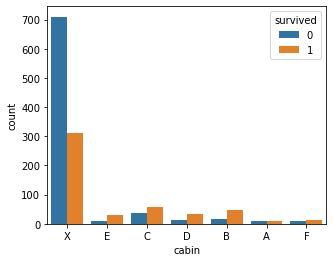

In [88]:
ax = sns.countplot(x='cabin', hue = 'survived',  data = whole_df)
#plt.show()

##### name 피처 활용하기

In [89]:
# 이름에서 호칭을 추출합니다.
name_grade = whole_df['name'].apply(lambda x : x.split(", ",1)[1].split(".")[0])
name_grade = name_grade.unique().tolist()
name_grade

['Miss',
 'Mr',
 'Master',
 'Mrs',
 'Dr',
 'Mlle',
 'Col',
 'Rev',
 'Ms',
 'Mme',
 'Sir',
 'the Countess',
 'Dona',
 'Jonkheer',
 'Lady',
 'Major',
 'Don',
 'Capt']

In [90]:
# 호칭에 따라 사회적 지위(1910년대 기준)를 정의합니다.
grade_dict = {'A': ['Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir'], # 명예직을 나타냅니다.
              'B': ['Ms', 'Mme', 'Mrs', 'Dona'], # 여성을 나타냅니다.
              'C': ['Jonkheer', 'the Countess'], # 귀족이나 작위를 나타냅니다.
              'D': ['Mr', 'Don'], # 남성을 나타냅니다.
              'E': ['Master'], # 젊은남성을 나타냅니다.
              'F': ['Miss', 'Mlle', 'Lady']} # 젊은 여성을 나타냅니다.

In [91]:
# 정의한 호칭의 기준에 따라, A~F의 문자로 name 피처를 다시 정의하는 함수입니다.
def give_grade(x):
    grade = x.split(", ", 1)[1].split(".")[0]
    for key, value in grade_dict.items():
        for title in value:
            if grade == title:
                return key
    return 'G'

In [92]:
# 위의 함수를 적용하여 name 피처를 새롭게 정의합니다.
whole_df['name'] = whole_df['name'].apply(lambda x: give_grade(x))
whole_df['name'].value_counts()

D    758
F    263
B    201
E     61
A     24
C      2
Name: name, dtype: int64

### `[미니 퀴즈 - 4.2]`
- `‘cabin’ 피처와 마찬가지로, ‘name’ 피처에 대해 (생존자/비생존) 그룹 간의 차이를 탐색해 보세요.` 
    - 위와 동일한 방법을 이용하여 생존자와 비생존자 그룹간의 분포가 어떻게 다른지, 시각적으로 탐색해보도록 합시다.
        - 동일한 countplot으로 아래처럼 시각화가 가능합니다.
        - 두 그룹간의 '평균'값의 차이를 검정한 t-test와 같이, 두 그룹간의 '분포'의 차이를 검정하는 방법에는 '카이제곱 검정' 이라는 방법이 있습니다.
        - 카이제곱 검정의 실행 결과, p-value 0.000으로 두 그룹간의 분포가 통계적으로 유의미하게 다르다는 것을 알 수 있습니다.
            - `이에 대한 결과도 아래에 포함하였습니다.`

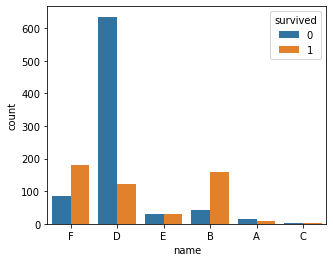

In [93]:
ax = sns.countplot(x='name', hue = 'survived',  data = whole_df)
plt.show()

- 카아제곱검정 : https://junsik-hwang.tistory.com/23

In [94]:
pd.set_option('display.float_format', None)

In [95]:
from scipy.stats import chi2_contingency

obs = pd.DataFrame({'생존': whole_df[whole_df['survived']==1]['cabin'].value_counts().sort_index().values, 
                    '사망': whole_df[whole_df['survived']==0]['cabin'].value_counts().sort_index()})
obs.index = ['A', 'B', 'C', 'D', 'E', 'F', 'Z']
chiresult = chi2_contingency(obs, correction=False)

In [96]:
# 카이제곱 통계량이 125 정도로 자유도 2의 3배인 6보다 훨씬 큰 값을 가지고 있고, 
# p-value 또한 0에 가까운 값이기 때문에 생존여부는 관련이 많이 있다고 분석해 볼 수 있다.
'Chi square: {}'.format(chiresult[0])

'Chi square: 125.12585699042339'

In [97]:
'P-value: {}'.format(chiresult[1])

'P-value: 1.363799923979482e-24'

- 과학적기수법 : https://financedata.github.io/posts/pandas-display-format.html

##### one-hot encoding

In [98]:
# pandas 패키지를 이용한 one-hot 인코딩을 수행합니다.
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]

In [99]:
df_test.head()

,pclass,survived,age,sibsp,parch,fare,name_A,name_B,name_C,name_D,...,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_X,embarked_C,embarked_Q,embarked_S
0,3,0,38.000000,0,0,7.8958,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,2,1,21.000000,0,1,21.0000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2,0,42.000000,1,0,27.0000,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,3,0,30.231444,0,0,14.5000,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,2,0,25.000000,0,0,31.5000,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


##### 피처 엔지니어링이 완료된 데이터셋 학습

In [100]:
# 데이터를 학습 데이터셋, 테스트 데이터셋으로 분리합니다.
x_train, y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
x_test, y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values

In [101]:
x_train

array([[ 2.        , 13.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.        ,  4.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.        , 30.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 3.        , 30.23144399,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 2.        , 20.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        , 32.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ]])

In [102]:
# 로지스틱 회귀 모델을 학습합니다.
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [103]:
# 학습한 모델의 테스트 데이터셋에 대한 예측 결과를 반환합니다.
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

In [104]:
# 테스트 데이터셋에 대한 accuracy, precision, recall, f1 평가 지표를 각각 출력합니다.
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred)) # AUC (Area Under the Curve) & ROC curve

accuracy: 0.79
Precision : 0.736
Recall : 0.701
F1 : 0.718


AUC : 0.853


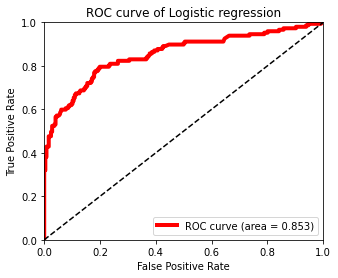

In [105]:
# AUC (Area Under the Curve)를 계산하여 출력합니다.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve를 그래프로 출력합니다.
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

### [피처 영향력 살펴보기]

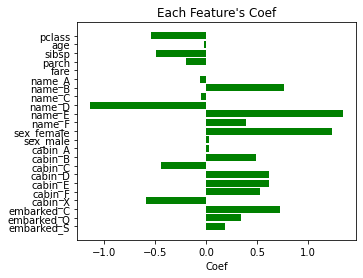

In [106]:
# 예측 대상인 survived 피처를 제외한 모든 피처를 리스트로 반환합니다. (그래프의 y축)
cols = df_train.columns.tolist()
cols.remove('survived')
y_pos = np.arange(len(cols))

# 각 피처별 회귀 분석 계수를 그래프의 x축으로 하여, 피처 영향력 그래프를 출력합니다.
plt.rcParams['figure.figsize'] = [5, 4]
fig, ax = plt.subplots()
ax.barh(y_pos, lr.coef_[0], align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(cols)
ax.invert_yaxis()
ax.set_xlabel('Coef')
ax.set_title("Each Feature's Coef")

plt.show()

# <Step4. 평가> : 모델 검증하기

### [K-fold 교차 검증 수행하기]

참고 : [K Folds Cross Validation Method](https://nonmeyet.tistory.com/entry/KFold-Cross-Validation%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D-%EC%A0%95%EC%9D%98-%EB%B0%8F-%EC%84%A4%EB%AA%85)

- K-fold 교차 검증을 통한 과적합 검증

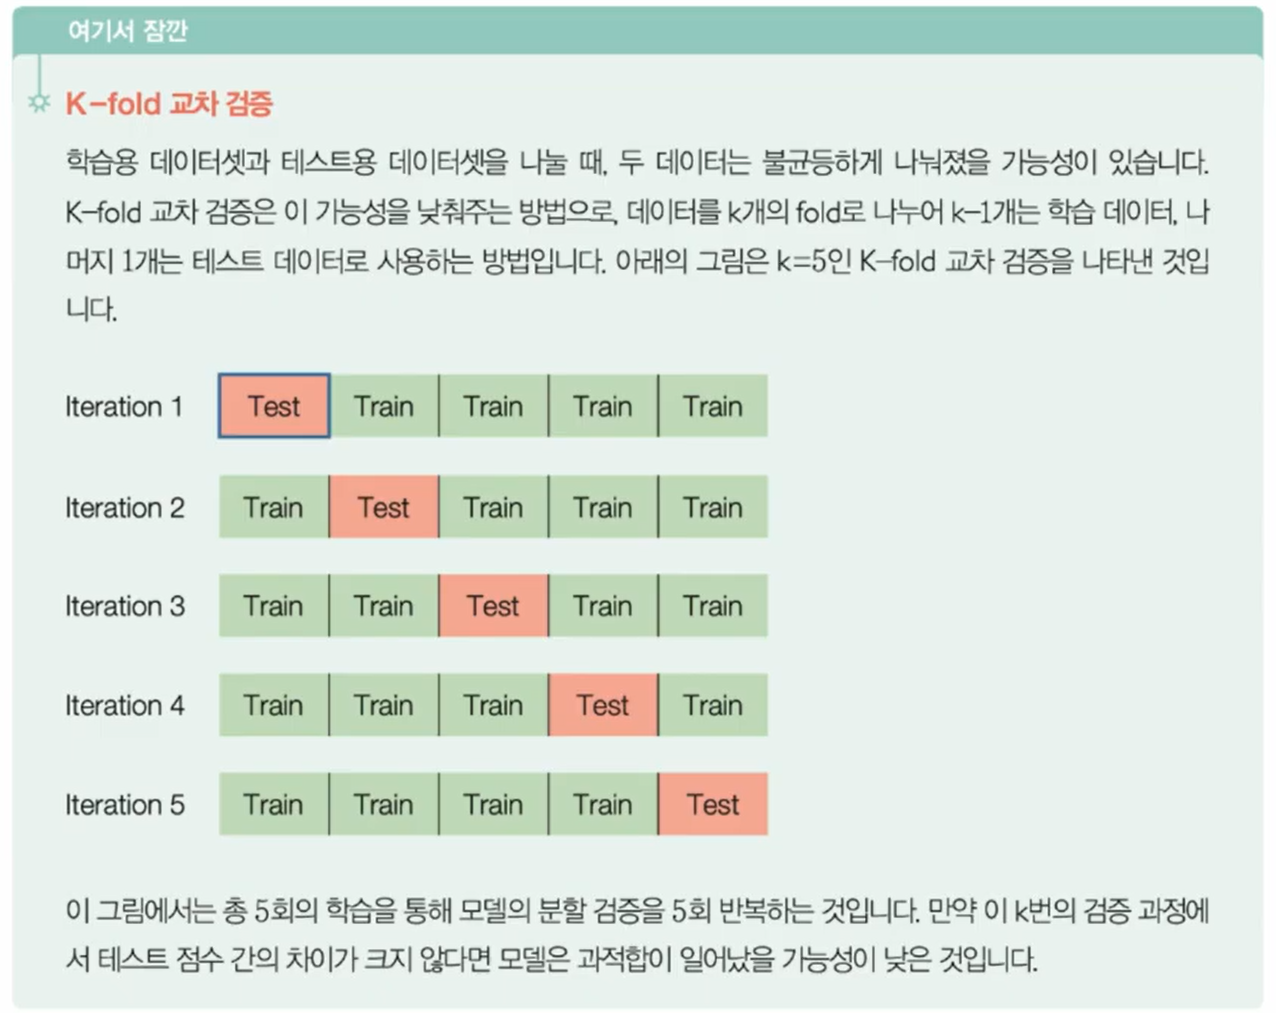

In [107]:
whole_df_encoded

,pclass,survived,age,sibsp,parch,fare,name_A,name_B,name_C,name_D,...,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_X,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,1,4.000000,1,1,23.0000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2,1,30.000000,1,0,13.8583,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,3,0,30.231444,0,0,7.7250,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,3,0,33.000000,0,0,7.8542,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
389,2,1,31.000000,0,0,21.0000,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
390,3,1,30.231444,0,0,7.7500,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
391,3,0,30.231444,0,0,7.7500,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [108]:
from sklearn.model_selection import KFold

# K-fold 교차 검증의 k를 5로 설정합니다.
k = 5
cv = KFold(k, shuffle=True, random_state=0)
acc_history = []

# K-fold를 5번의 분할 학습으로 반복합니다.
for i, (train_data_row, test_data_row) in enumerate(cv.split(whole_df_encoded)):

    # 5개로 분할된 fold 중 4개를 학습 데이터셋, 1개를 테스트 데이터셋으로 지정합니다. 매 반복시마다, 테스트 데이터셋은 변경됩니다.
    df_train = whole_df_encoded.iloc[train_data_row]
    df_test = whole_df_encoded.iloc[test_data_row]
    
    # survived 피처를 y, 나머지 피처들을 x 데이터로 지정합니다.
    splited_x_train, splited_y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
    splited_x_test, splited_y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values
    
    # 주어진 데이터로 로지스틱 회귀 모델을 학습합니다.
    lr = LogisticRegression(random_state=0)
    lr.fit(splited_x_train, splited_y_train)
    y_pred = lr.predict(splited_x_test)
    
    # 테스트 데이터셋의 Accuracy를 계산하여 acc_history에 저장합니다.
    splited_acc = accuracy_score(splited_y_test, y_pred)
    acc_history.append(splited_acc)

In [109]:
acc_history

[0.7748091603053435,
 0.8282442748091603,
 0.8129770992366412,
 0.816793893129771,
 0.8160919540229885]

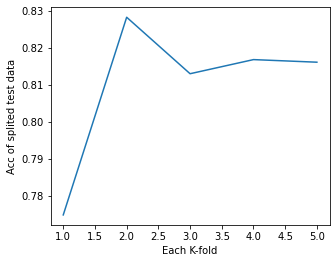

In [110]:
# acc_history에 저장된 5번의 학습 결과(Accuracy)를 그래프로 출력합니다.
plt.xlabel("Each K-fold")
plt.ylabel("Acc of splited test data")
plt.plot(range(1, k+1), acc_history)

In [111]:
sum(acc_history) / len(acc_history)

0.8097832763007808

### [학습 곡선 분석하기]

- 학습 곡선은 다양한 길이의 데이터 세트에서 모델을 학습하고 학습 및 테스트 세트 모두에 대해 교차 검증 된 점수 대 데이터 세트 크기의 플롯을 생성 한 결과입니다.


- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지를 설치해 줍니다.
    - (env_name) $ `pip install scikit-plot`

In [112]:
# !pip install scikit-plot
# !pip install --user scipy==1.7.3
# !pip install --user --upgrade scikit-plot

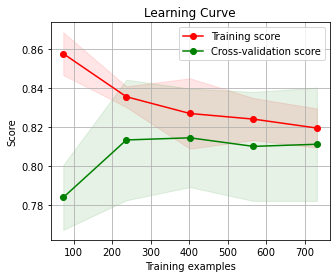

In [113]:
# 학습 데이터와 테스트 데이터의 점수가 벌어지는 과적합에 대한 학습곡선 관찰
# 학습 데이터 샘플의 개수가 증가함에 따라 학습과 테스트 두 점수가 어떻게 변화하는지 관찰한 그래프
# 데이터가 300개 이상인 경우에는 과적합의 위험이 낮아진다는 것

import scikitplot as skplt
skplt.estimators.plot_learning_curve(lr, x_train, y_train)
plt.show()

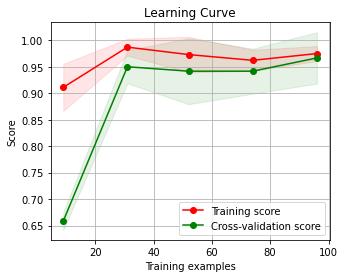

In [114]:
import scikitplot as skplt
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화
lr = LogisticRegression(max_iter=200)

# 학습 곡선 그리기
skplt.estimators.plot_learning_curve(lr, X_train, y_train)
plt.show()


# [ 추가 실습 ]

**- 추가적인 데이터 전처리를 활용한 성능 개선 : pclass, age, sibsp, parch 등 데이터 전처리 (범주형 pclass의 경우 필수)**

**- 혹시 삭제하면 성능이 개선되는 피쳐는 없는지 ...**

**- 전처리 방식을 변경할 데이터는 없는지 ... (pclass에 따른 age fillna)**

**- decision tree 모델을 적용하기 위해서는 ...**

**- 여러 모델(2개 이상의 모델)을 한번에 적용 분석하기 위해서는 ...**

**- 기타 ... 모델 성능 개선을 위한 사항들 ...**

In [200]:
df_train = pd.read_csv("data_titanic_adv/titanic_train.csv")
df_test = pd.read_csv("data_titanic_adv/titanic_test.csv")

In [167]:
df_train.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'body', 'home.dest'],
      dtype='object')

In [168]:
df_train.drop(['fare', 'ticket', 'body', 'home.dest'], axis=1, inplace=True)
df_test.drop(['fare', 'ticket', 'body', 'home.dest'], axis=1, inplace=True)

In [169]:
df_train

,pclass,survived,name,sex,age,sibsp,parch,cabin,embarked
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.00,0,1,NaN,S
1,2,1,"Wells, Miss. Joan",female,4.00,1,1,NaN,S
2,2,1,"Duran y More, Miss. Florentina",female,30.00,1,0,NaN,C
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,NaN,Q
4,3,1,"Bradley, Miss. Bridget Delia",female,22.00,0,0,NaN,Q
...,...,...,...,...,...,...,...,...,...
911,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.17,1,2,NaN,S
912,3,0,"Guest, Mr. Robert",male,NaN,0,0,NaN,S
913,3,1,"Smyth, Miss. Julia",female,NaN,0,0,NaN,Q
914,2,1,"Sincock, Miss. Maude",female,20.00,0,0,NaN,S


In [170]:
replace_mean = df_train[df_train['age'] > 0]['age'].mean()

In [171]:
df_train['age'].fillna(replace_mean, inplace=True)
df_test['age'].fillna(replace_mean, inplace=True)

In [162]:
df_train['cabin'].unique()

array([nan, 'E36', 'C68', 'E24', 'C22 C26', 'D38', 'B50', 'A24', 'C111',
       'F', 'C6', 'C87', 'E8', 'B45', 'C93', 'D28', 'D36', 'C125', 'B35',
       'T', 'B73', 'B57 B59 B63 B66', 'A26', 'A18', 'B96 B98', 'G6',
       'C78', 'C101', 'D9', 'D33', 'C128', 'E50', 'B26', 'B69', 'E121',
       'C123', 'B94', 'A34', 'D', 'C39', 'D43', 'E31', 'B5', 'D17', 'F33',
       'E44', 'D7', 'A21', 'D34', 'A29', 'D35', 'A11', 'B51 B53 B55',
       'D46', 'E60', 'C30', 'D26', 'E68', 'A9', 'B71', 'D37', 'F2',
       'C55 C57', 'C89', 'C124', 'C23 C25 C27', 'C126', 'E49', 'F E46',
       'E46', 'D19', 'B58 B60', 'C82', 'B52 B54 B56', 'C92', 'E45',
       'F G73', 'C65', 'E25', 'B3', 'D40', 'C91', 'B102', 'B61', 'F G63',
       'A20', 'B36', 'C7', 'B77', 'D20', 'C148', 'C105', 'E38', 'B86',
       'C132', 'C86', 'A14', 'C54', 'A5', 'B49', 'B28', 'B24', 'C2', 'F4',
       'A6', 'C83', 'B42', 'A36', 'C52', 'D56', 'C116', 'B19', 'E77',
       'F E57', 'E101', 'B18', 'C95', 'D15', 'E33', 'B30', 'D21', 'E1

In [163]:
df_train['cabin'].fillna('X', inplace=True)
df_test['cabin'].fillna('X', inplace=True)

In [164]:
df_train['cabin'] = df_train['cabin'].apply(lambda x : x[0])
df_test['cabin'] = df_test['cabin'].apply(lambda x : x[0])

In [165]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    916 non-null    int64  
 1   survived  916 non-null    int64  
 2   name      916 non-null    object 
 3   sex       916 non-null    object 
 4   age       916 non-null    float64
 5   sibsp     916 non-null    int64  
 6   parch     916 non-null    int64  
 7   cabin     916 non-null    object 
 8   embarked  914 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 64.5+ KB


In [172]:
# embark : 2개의 결측값을 최빈값으로 대체합니다.
embarked_mode = df_train['embarked'].value_counts().index[0]
embarked_mode

'S'

In [173]:
df_train['embarked'].fillna(embarked_mode, inplace=True)
df_test['embarked'].fillna(embarked_mode, inplace=True)

In [174]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    916 non-null    int64  
 1   survived  916 non-null    int64  
 2   name      916 non-null    object 
 3   sex       916 non-null    object 
 4   age       916 non-null    float64
 5   sibsp     916 non-null    int64  
 6   parch     916 non-null    int64  
 7   cabin     214 non-null    object 
 8   embarked  916 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 64.5+ KB


In [175]:
whole_df = df_train.append(df_test)
whole_df

,pclass,survived,name,sex,age,sibsp,parch,cabin,embarked
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.000000,0,1,NaN,S
1,2,1,"Wells, Miss. Joan",female,4.000000,1,1,NaN,S
2,2,1,"Duran y More, Miss. Florentina",female,30.000000,1,0,NaN,C
3,3,0,"Scanlan, Mr. James",male,30.231444,0,0,NaN,Q
4,3,1,"Bradley, Miss. Bridget Delia",female,22.000000,0,0,NaN,Q
...,...,...,...,...,...,...,...,...,...
388,3,0,"Karlsson, Mr. Julius Konrad Eugen",male,33.000000,0,0,NaN,S
389,2,1,"Ware, Mrs. John James (Florence Louise Long)",female,31.000000,0,0,NaN,S
390,3,1,"O'Keefe, Mr. Patrick",male,30.231444,0,0,NaN,Q
391,3,0,"Tobin, Mr. Roger",male,30.231444,0,0,F38,Q


In [176]:
# 결측 데이터의 경우는 ‘X’로 대체합니다.
whole_df['cabin'] = whole_df['cabin'].fillna('X')

In [177]:
# cabin 피처의 첫 번째 문자를 추출합니다.
whole_df['cabin'] = whole_df['cabin'].apply(lambda x: x[0])

In [178]:
whole_df['cabin'].value_counts()

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin, dtype: int64

In [179]:
# 추출한 문자 중, G와 T는 수가 너무 작기 때문에, 마찬가지로 ‘X’로 대체합니다.
whole_df['cabin'] = whole_df['cabin'].replace({"G":"X", "T":"X"})

In [180]:
# 이름에서 호칭을 추출합니다.
name_grade = whole_df['name'].apply(lambda x : x.split(", ",1)[1].split(".")[0])
name_grade = name_grade.unique().tolist()
name_grade

['Miss',
 'Mr',
 'Master',
 'Mrs',
 'Dr',
 'Mlle',
 'Col',
 'Rev',
 'Ms',
 'Mme',
 'Sir',
 'the Countess',
 'Dona',
 'Jonkheer',
 'Lady',
 'Major',
 'Don',
 'Capt']

In [181]:
# 호칭에 따라 사회적 지위(1910년대 기준)를 정의합니다.
grade_dict = {'A': ['Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir'], # 명예직을 나타냅니다.
              'B': ['Ms', 'Mme', 'Mrs', 'Dona'], # 여성을 나타냅니다.
              'C': ['Jonkheer', 'the Countess'], # 귀족이나 작위를 나타냅니다.
              'D': ['Mr', 'Don'], # 남성을 나타냅니다.
              'E': ['Master'], # 젊은남성을 나타냅니다.
              'F': ['Miss', 'Mlle', 'Lady']} # 젊은 여성을 나타냅니다.

In [182]:
# 정의한 호칭의 기준에 따라, A~F의 문자로 name 피처를 다시 정의하는 함수입니다.
def give_grade(x):
    grade = x.split(", ", 1)[1].split(".")[0]
    for key, value in grade_dict.items():
        for title in value:
            if grade == title:
                return key
    return 'G'

In [183]:
# 위의 함수를 적용하여 name 피처를 새롭게 정의합니다.
whole_df['name'] = whole_df['name'].apply(lambda x: give_grade(x))
whole_df['name'].value_counts()

D    758
F    263
B    201
E     61
A     24
C      2
Name: name, dtype: int64

In [184]:
whole_df_encoded = pd.get_dummies(whole_df)

In [185]:
whole_df_encoded

,pclass,survived,age,sibsp,parch,name_A,name_B,name_C,name_D,name_E,name_F,sex_female,sex_male,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_X,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
1,2,1,4.000000,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
2,2,1,30.000000,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0
3,3,0,30.231444,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
4,3,1,22.000000,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,3,0,33.000000,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
389,2,1,31.000000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
390,3,1,30.231444,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
391,3,0,30.231444,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [186]:
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]

In [187]:
df_train.tail()

,pclass,survived,age,sibsp,parch,name_A,name_B,name_C,name_D,name_E,name_F,sex_female,sex_male,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_X,embarked_C,embarked_Q,embarked_S
911,3,1,0.170000,1,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
912,3,0,30.231444,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
913,3,1,30.231444,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0
914,2,1,20.000000,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
915,3,0,32.000000,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [188]:
df_train.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'name_A', 'name_B',
       'name_C', 'name_D', 'name_E', 'name_F', 'sex_female', 'sex_male',
       'cabin_A', 'cabin_B', 'cabin_C', 'cabin_D', 'cabin_E', 'cabin_F',
       'cabin_X', 'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [154]:
df_test.head()

,pclass,survived,age,sibsp,parch,name_A,name_B,name_C,name_D,name_E,name_F,sex_female,sex_male,ticket_110152,ticket_110413,ticket_110465,ticket_110469,ticket_110489,ticket_110564,ticket_110813,ticket_111163,ticket_111240,ticket_111320,ticket_111361,ticket_111369,ticket_111426,ticket_111427,ticket_111428,ticket_112050,ticket_112051,ticket_112052,ticket_112053,ticket_112058,ticket_112059,ticket_112277,ticket_112377,ticket_112378,ticket_112379,ticket_112901,ticket_113028,ticket_113038,ticket_113043,ticket_113044,ticket_113050,ticket_113051,ticket_113054,ticket_113055,ticket_113056,ticket_113059,ticket_113501,ticket_113503,ticket_113505,ticket_113509,ticket_113510,ticket_113514,ticket_113572,ticket_113760,ticket_113767,ticket_113773,ticket_113776,ticket_113778,ticket_113780,ticket_113781,ticket_113783,ticket_113784,ticket_113786,ticket_113787,ticket_113788,ticket_113789,ticket_113790,ticket_113791,ticket_113792,ticket_113794,ticket_113795,ticket_113796,ticket_113798,ticket_113800,ticket_113801,ticket_113803,ticket_113804,ticket_113806,ticket_113807,ticket_11668,ticket_11751,ticket_11752,ticket_11753,ticket_11755,ticket_11765,ticket_11767,ticket_11769,ticket_11770,ticket_11771,ticket_11774,ticket_11778,ticket_11813,ticket_11967,ticket_1222,ticket_12233,ticket_12460,ticket_12749,ticket_13049,ticket_13050,ticket_13213,ticket_13214,ticket_13236,ticket_13502,ticket_13507,ticket_13508,ticket_13509,ticket_13567,ticket_13568,ticket_13695,ticket_13905,ticket_14311,ticket_14312,ticket_14313,ticket_14973,ticket_1601,ticket_16966,ticket_16988,ticket_17421,ticket_17453,ticket_17463,ticket_17464,ticket_17465,ticket_17466,ticket_17474,ticket_17475,ticket_17764,ticket_17765,ticket_17770,ticket_19877,ticket_19924,ticket_19928,ticket_19943,ticket_19947,ticket_19950,ticket_19952,ticket_19972,ticket_19988,ticket_19996,ticket_2003,ticket_211535,ticket_211536,ticket_21228,ticket_21332,ticket_21440,ticket_218629,ticket_219533,ticket_220367,ticket_220844,ticket_220845,ticket_2223,ticket_223596,ticket_226593,ticket_226875,ticket_228414,ticket_229236,ticket_230080,ticket_230136,ticket_230433,ticket_230434,ticket_231919,ticket_231945,ticket_233478,ticket_233639,ticket_233734,ticket_233866,ticket_234360,ticket_234604,ticket_234686,ticket_234818,ticket_235509,ticket_236171,ticket_236852,ticket_236853,ticket_236854,ticket_237216,ticket_237249,ticket_237393,ticket_237442,ticket_237565,ticket_237668,ticket_237670,ticket_237671,ticket_237734,ticket_237735,ticket_237736,ticket_237789,ticket_237798,ticket_239059,ticket_239853,ticket_239854,ticket_239855,ticket_239856,ticket_239865,ticket_240261,ticket_240276,ticket_24065,ticket_240929,ticket_24160,ticket_242963,ticket_243847,ticket_243880,ticket_244252,ticket_244270,ticket_244278,ticket_244310,ticket_244346,ticket_244358,ticket_244360,ticket_244361,ticket_244367,ticket_244368,ticket_244373,ticket_248659,ticket_248698,ticket_248706,ticket_248723,ticket_248726,ticket_248727,ticket_248731,ticket_248733,ticket_248734,ticket_248738,ticket_248740,ticket_248744,ticket_248746,ticket_248747,ticket_250643,ticket_250644,ticket_250646,ticket_250647,ticket_250648,ticket_250649,ticket_250650,ticket_250651,ticket_250652,ticket_250653,ticket_250655,ticket_2543,ticket_2620,ticket_2621,ticket_2622,ticket_2623,ticket_2624,ticket_2625,ticket_2626,ticket_2627,ticket_2628,ticket_2629,ticket_2631,ticket_26360,ticket_2641,ticket_2647,ticket_2648,ticket_2649,ticket_2650,ticket_2651,ticket_2652,ticket_2653,ticket_2654,ticket_2655,ticket_2656,ticket_2657,ticket_2658,ticket_2659,ticket_2660,ticket_2661,ticket_2662,ticket_2663,ticket_2664,ticket_2665,ticket_2666,ticket_2667,ticket_2668,ticket_2669,ticket_2670,ticket_26707,ticket_2671,ticket_2672,ticket_2673,ticket_2674,ticket_2675,ticket_2676,ticket_2677,ticket_2678,ticket_2679,ticket_2680,ticket_2681,ticket_2682,ticket_2683,ticket_2684,ticket_2685,ticket_2686,ticket_2687,ticket_2688,ticket_2689,ticket_2690,ticket_2691,ticket_2692,ticket_2693,ticket_2694,ticket_2695,ticket_2696,ticket_2697,tic

In [207]:
pd.set_option('display.max_columns', None)

In [189]:
# 데이터를 학습 데이터셋, 테스트 데이터셋으로 분리합니다.
x_train, y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
x_test, y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values

In [190]:
# 로지스틱 회귀 모델을 학습합니다.
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [191]:
# 학습한 모델의 테스트 데이터셋에 대한 예측 결과를 반환합니다.
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

In [192]:
# 테스트 데이터셋에 대한 accuracy, precision, recall, f1 평가 지표를 각각 출력합니다.
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred)) # AUC (Area Under the Curve) & ROC curve

accuracy: 0.80
Precision : 0.741
Recall : 0.721
F1 : 0.731


AUC : 0.851


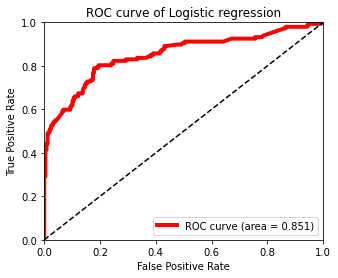

In [193]:
# AUC (Area Under the Curve)를 계산하여 출력합니다.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve를 그래프로 출력합니다.
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

In [194]:
from sklearn.model_selection import KFold

# K-fold 교차 검증의 k를 5로 설정합니다.
k = 5
cv = KFold(k, shuffle=True, random_state=0)
acc_history = []

# K-fold를 5번의 분할 학습으로 반복합니다.
for i, (train_data_row, test_data_row) in enumerate(cv.split(whole_df_encoded)):

    # 5개로 분할된 fold 중 4개를 학습 데이터셋, 1개를 테스트 데이터셋으로 지정합니다. 매 반복시마다, 테스트 데이터셋은 변경됩니다.
    df_train = whole_df_encoded.iloc[train_data_row]
    df_test = whole_df_encoded.iloc[test_data_row]
    
    # survived 피처를 y, 나머지 피처들을 x 데이터로 지정합니다.
    splited_x_train, splited_y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
    splited_x_test, splited_y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values
    
    # 주어진 데이터로 로지스틱 회귀 모델을 학습합니다.
    lr = LogisticRegression(random_state=0)
    lr.fit(splited_x_train, splited_y_train)
    y_pred = lr.predict(splited_x_test)
    
    # 테스트 데이터셋의 Accuracy를 계산하여 acc_history에 저장합니다.
    splited_acc = accuracy_score(splited_y_test, y_pred)
    acc_history.append(splited_acc)

In [195]:
acc_history

[0.7824427480916031,
 0.816793893129771,
 0.8129770992366412,
 0.8206106870229007,
 0.8160919540229885]

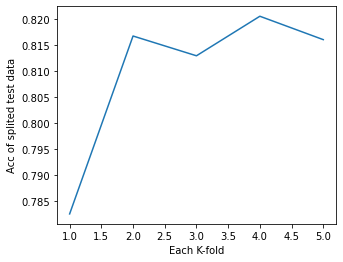

In [196]:
# acc_history에 저장된 5번의 학습 결과(Accuracy)를 그래프로 출력합니다.
plt.xlabel("Each K-fold")
plt.ylabel("Acc of splited test data")
plt.plot(range(1, k+1), acc_history)

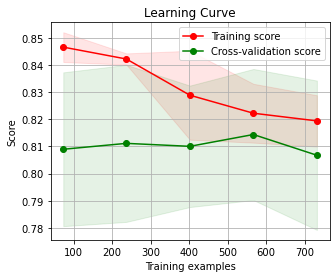

In [197]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lr, x_train, y_train)
plt.show()

In [129]:
df_train = pd.read_csv("data_titanic_adv/titanic_train.csv")
df_test = pd.read_csv("data_titanic_adv/titanic_test.csv")

In [5]:
df_train

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.00,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.00,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.00,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.00,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S,NaN,"Devon, England Wichita, KS"
912,3,0,"Guest, Mr. Robert",male,NaN,0,0,376563,8.0500,NaN,S,NaN,NaN
913,3,1,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,NaN,NaN
914,2,1,"Sincock, Miss. Maude",female,20.00,0,0,C.A. 33112,36.7500,NaN,S,NaN,"Cornwall / Hancock, MI"


In [242]:
df_train['cabin'].fillna('X', inplace=True)
df_test['cabin'].fillna('X', inplace=True)
df_train['cabin'] = df_train['cabin'].apply(lambda x : x[0])
df_test['cabin'] = df_test['cabin'].apply(lambda x : x[0])

In [93]:
df_train.drop(['ticket', 'fare', 'body'], axis=1, inplace=True)
df_test.drop(['ticket', 'fare', 'body'], axis=1, inplace=True)

In [10]:
df_train

,pclass,survived,name,sex,age,sibsp,parch,cabin,embarked,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.00,0,1,NaN,S,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.00,1,1,NaN,S,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.00,1,0,NaN,C,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,NaN,Q,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.00,0,0,NaN,Q,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."
...,...,...,...,...,...,...,...,...,...,...
911,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.17,1,2,NaN,S,"Devon, England Wichita, KS"
912,3,0,"Guest, Mr. Robert",male,NaN,0,0,NaN,S,NaN
913,3,1,"Smyth, Miss. Julia",female,NaN,0,0,NaN,Q,NaN
914,2,1,"Sincock, Miss. Maude",female,20.00,0,0,NaN,S,"Cornwall / Hancock, MI"


In [130]:
whole_df = df_train.append(df_test)
whole_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,3,0,"Karlsson, Mr. Julius Konrad Eugen",male,33.0,0,0,347465,7.8542,NaN,S,NaN,NaN
389,2,1,"Ware, Mrs. John James (Florence Louise Long)",female,31.0,0,0,CA 31352,21.0000,NaN,S,NaN,"Bristol, England / New Britain, CT"
390,3,1,"O'Keefe, Mr. Patrick",male,NaN,0,0,368402,7.7500,NaN,Q,NaN,NaN
391,3,0,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q,NaN,NaN


In [131]:
whole_df.drop(['ticket', 'fare', 'body'], axis=1, inplace=True)

In [132]:
whole_df

,pclass,survived,name,sex,age,sibsp,parch,cabin,embarked,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,NaN,S,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,NaN,S,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,NaN,C,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,NaN,Q,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,NaN,Q,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."
...,...,...,...,...,...,...,...,...,...,...
388,3,0,"Karlsson, Mr. Julius Konrad Eugen",male,33.0,0,0,NaN,S,NaN
389,2,1,"Ware, Mrs. John James (Florence Louise Long)",female,31.0,0,0,NaN,S,"Bristol, England / New Britain, CT"
390,3,1,"O'Keefe, Mr. Patrick",male,NaN,0,0,NaN,Q,NaN
391,3,0,"Tobin, Mr. Roger",male,NaN,0,0,F38,Q,NaN


In [11]:
df_train.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'cabin',
       'embarked', 'home.dest'],
      dtype='object')

In [12]:
df_train[df_train['age'].isnull()].iloc[0]

pclass                        3
survived                      0
name         Scanlan, Mr. James
sex                        male
age                         NaN
sibsp                         0
parch                         0
cabin                       NaN
embarked                      Q
home.dest                   NaN
Name: 3, dtype: object

In [13]:
df_train[(~df_train['age'].isnull()) & (df_train['pclass'] == 3) & (df_train['survived'] == 0) & (df_train['sibsp'] == 0) & (df_train['parch'] == 0) & (df_train['embarked'] == 'Q')]['age'].median()

27.0

In [14]:
len(df_train[df_train['age'].isnull()])

175

In [22]:
df_train[df_train['age'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,cabin,embarked,home.dest
249,3,1,"McCoy, Miss. Agnes",female,NaN,2,0,NaN,Q,NaN
384,3,0,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,NaN,C,"Syria Kent, ON"
520,3,0,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,NaN,S,NaN
868,3,0,"van Billiard, Master. James William",male,NaN,1,1,NaN,S,NaN


In [290]:
for i in range(len(df_train[df_train['age'].isnull()])):
    pclass = df_train[df_train['age'].isnull()].iloc[i]['pclass']
    survived = df_train[df_train['age'].isnull()].iloc[i]['survived']
    sex = df_train[df_train['age'].isnull()].iloc[i]['sex']
    sibsp = df_train[df_train['age'].isnull()].iloc[i]['sibsp']
    parch = df_train[df_train['age'].isnull()].iloc[i]['parch']
    embarked = df_train[df_train['age'].isnull()].iloc[i]['embarked']
    df_train[df_train['age'].isnull()].iloc[i]['age'] = df_train[(~df_train['age'].isnull()) & (df_train['pclass'] == pclass) & (df_train['survived'] == survived) & (df_train['sibsp'] == sibsp) & (df_train['parch'] == parch) & (df_train['embarked'] == embarked)]['age'].median()

In [133]:
for i in range(len(whole_df[whole_df['age'].isnull()])):
    condition = (whole_df['pclass'] == whole_df[whole_df['age'].isnull()].iloc[i]['pclass']) & \
                (whole_df['survived'] == whole_df[whole_df['age'].isnull()].iloc[i]['survived']) & \
                (whole_df['sibsp'] == whole_df[df_train['age'].isnull()].iloc[i]['sibsp']) & \
                (whole_df['parch'] == whole_df[df_train['age'].isnull()].iloc[i]['parch'])
    
    median_cabin = whole_df[(~whole_df['age'].isnull()) & condition]['age'].iloc[0]
    
    whole_df.loc[whole_df['age'].isnull() & condition, 'age'] = median_age

IndexError: single positional indexer is out-of-bounds

In [145]:
for i in range(len(whole_df[whole_df['cabin'].isnull()])):
    # 현재 행의 조건 설정
    condition = (whole_df['pclass'] == whole_df[whole_df['cabin'].isnull()].iloc[i]['pclass']) & \
                (whole_df['survived'] == whole_df[whole_df['cabin'].isnull()].iloc[i]['survived']) #& \
#                 (whole_df['sibsp'] == whole_df[whole_df['cabin'].isnull()].iloc[i]['sibsp']) #& \
#                 (whole_df['parch'] == whole_df[whole_df['cabin'].isnull()].iloc[i]['parch']) & \
#                 (whole_df['embarked'] == whole_df[whole_df['cabin'].isnull()].iloc[i]['embarked'])
    
    # 조건에 맞는 cabin 값 추출
    matching_cabins = whole_df[(~whole_df['cabin'].isnull()) & condition]['cabin']
    
    if len(matching_cabins) > 0:
        # 중앙값 계산
        median_cabin = matching_cabins.mode()[0]  # 최빈값(중앙값에 더 가까운 값 사용)
        
        # null 값을 중앙값으로 채움
        whole_df.loc[whole_df['cabin'].isnull() & condition, 'cabin'] = median_cabin


IndexError: single positional indexer is out-of-bounds

In [161]:
whole_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 392
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   cabin      1309 non-null   object 
 8   embarked   1309 non-null   object 
 9   home.dest  745 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 112.5+ KB


In [147]:
whole_df[whole_df['cabin'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,cabin,embarked,home.dest
197,2,1,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,NaN,S,"Elizabeth, NJ"


In [126]:
whole_df[(whole_df['pclass'] == 2) & (whole_df['survived'] == 1) & (whole_df['sex'] == 'female') & (whole_df['sibsp'] == 0)]

,pclass,survived,name,sex,age,sibsp,parch,cabin,embarked,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,NaN,S,"England / Bennington, VT"
27,2,1,"Doling, Miss. Elsie",female,18.0,0,1,NaN,S,Southampton
77,2,1,"Cameron, Miss. Clear Annie",female,35.0,0,0,NaN,S,"Mamaroneck, NY"
95,2,1,"Rugg, Miss. Emily",female,21.0,0,0,NaN,S,"Guernsey / Wilmington, DE"
116,2,1,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,NaN,S,"London / New York, NY"
140,2,1,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,NaN,S,Spain
184,2,1,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,F,S,"Folkstone, Kent / New York, NY"
187,2,1,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,NaN,S,"Aberdeen / Portland, OR"
202,2,1,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,F,S,"Chicago, IL"
220,2,1,"Bentham, Miss. Lilian W",female,19.0,0,0,NaN,S,"Rochester, NY"


In [135]:
whole_df['age'].fillna(whole_df['age'].median(), inplace=True)

In [59]:
whole_df[~whole_df['cabin'].isnull()]['cabin'] = whole_df[~whole_df['cabin'].isnull()]['cabin'].apply(lambda x : x[0])

In [137]:
whole_df.loc[~whole_df['cabin'].isnull(), 'cabin'] = whole_df.loc[~whole_df['cabin'].isnull(), 'cabin'].apply(lambda x: x[0])

In [124]:
whole_df[whole_df['cabin'].isnull()]['cabin'].iloc[0]

nan

In [155]:
whole_df[~whole_df['cabin'].isnull()]['cabin'].value_counts()

F    723
E    160
C    145
G    123
B     70
D     55
A     33
Name: cabin, dtype: int64

In [151]:
whole_df['cabin'].fillna('E', inplace=True)

In [79]:
whole_df[~whole_df['cabin'].isnull()].iloc[0]

pclass                                    1
survived                                  1
name         Francatelli, Miss. Laura Mabel
sex                                  female
age                                      30
sibsp                                     0
parch                                     0
cabin                                     E
embarked                                  C
home.dest                               NaN
Name: 6, dtype: object

In [69]:
whole_df['age'] = whole_df['age'].astype(int)

In [160]:
whole_df[whole_df['embarked'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,cabin,embarked,home.dest


In [159]:
whole_df['embarked'].fillna('S', inplace=True)

In [50]:
whole_df[whole_df['age'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,cabin,embarked,home.dest


In [154]:
whole_df['cabin'] = whole_df['cabin'].replace({"T":"F"})

In [173]:
whole_df.drop(['home.dest', 'home'], axis=1, inplace=True)

In [172]:
whole_df[~whole_df['home.dest'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,cabin,embarked,home.dest,home
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,F,S,"England / Bennington, VT",England
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,F,S,"Cornwall / Akron, OH",Cornwall
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,F,C,"Barcelona, Spain / Havana, Cuba","Barcelona, Spain"
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,E,Q,"Kingwilliamstown, Co Cork, Ireland Glens Falls...","Kingwilliamstown, Co Cork, Ireland Glens Falls..."
7,2,1,"Quick, Miss. Phyllis May",female,2.0,1,1,F,S,"Plymouth, Devon / Detroit, MI","Plymouth, Devon"
...,...,...,...,...,...,...,...,...,...,...,...
381,1,0,"Crosby, Capt. Edward Gifford",male,70.0,1,1,B,S,"Milwaukee, WI","Milwaukee, WI"
382,1,0,"Smith, Mr. James Clinch",male,56.0,0,0,A,C,"St James, Long Island, NY","St James, Long Island, NY"
383,1,0,"Compton, Mr. Alexander Taylor Jr",male,37.0,1,1,E,C,"Lakewood, NJ","Lakewood, NJ"
385,2,1,"Hold, Mrs. Stephen (Annie Margaret Hill)",female,29.0,1,0,F,S,"England / Sacramento, CA",England


In [170]:
whole_df['dest'] = whole_df['home.dest'].apply(lambda x : x.split("/")[1] if pd.notnull(x) else x)

IndexError: list index out of range

In [176]:
# 호칭에 따라 사회적 지위(1910년대 기준)를 정의합니다.
grade_dict = {'A': ['Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir'], # 명예직을 나타냅니다.
              'B': ['Ms', 'Mme', 'Mrs', 'Dona'], # 여성을 나타냅니다.
              'C': ['Jonkheer', 'the Countess'], # 귀족이나 작위를 나타냅니다.
              'D': ['Mr', 'Don'], # 남성을 나타냅니다.
              'E': ['Master'], # 젊은남성을 나타냅니다.
              'F': ['Miss', 'Mlle', 'Lady']} # 젊은 여성을 나타냅니다.

In [177]:
# 정의한 호칭의 기준에 따라, A~F의 문자로 name 피처를 다시 정의하는 함수입니다.
def give_grade(x):
    grade = x.split(", ", 1)[1].split(".")[0]
    for key, value in grade_dict.items():
        for title in value:
            if grade == title:
                return key
    return 'G'

In [178]:
# 위의 함수를 적용하여 name 피처를 새롭게 정의합니다.
whole_df['name'] = whole_df['name'].apply(lambda x: give_grade(x))
whole_df['name'].value_counts()

D    758
F    263
B    201
E     61
A     24
C      2
Name: name, dtype: int64

In [182]:
whole_df['age'] = whole_df['age'].astype(int)

,pclass,survived,name,sex,age,sibsp,parch,cabin,embarked
0,2,1,F,female,13,0,1,F,S
1,2,1,F,female,4,1,1,F,S
2,2,1,F,female,30,1,0,F,C
3,3,0,D,male,24,0,0,F,Q
4,3,1,F,female,22,0,0,E,Q
...,...,...,...,...,...,...,...,...,...
388,3,0,D,male,33,0,0,F,S
389,2,1,B,female,31,0,0,F,S
390,3,1,D,male,24,0,0,E,Q
391,3,0,D,male,24,0,0,F,Q


In [184]:
whole_df_encoded = pd.get_dummies(whole_df)

In [185]:
whole_df_encoded

,pclass,survived,age,sibsp,parch,name_A,name_B,name_C,name_D,name_E,...,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,embarked_C,embarked_Q,embarked_S
0,2,1,13,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2,1,4,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,1,30,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,3,0,24,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,3,1,22,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,3,0,33,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
389,2,1,31,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
390,3,1,24,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
391,3,0,24,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [188]:
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]

In [187]:
train_idx_num = len(df_train)
train_idx_num

916

In [190]:
df_train.tail()

,pclass,survived,age,sibsp,parch,name_A,name_B,name_C,name_D,name_E,...,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,embarked_C,embarked_Q,embarked_S
911,3,1,0,1,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
912,3,0,24,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
913,3,1,24,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
914,2,1,20,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
915,3,0,32,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [192]:
df_test.head()

,pclass,survived,age,sibsp,parch,name_A,name_B,name_C,name_D,name_E,...,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,embarked_C,embarked_Q,embarked_S
0,3,0,38,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,2,1,21,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,0,42,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,3,0,24,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,2,0,25,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [197]:
# 데이터를 학습 데이터셋, 테스트 데이터셋으로 분리합니다.
x_train, y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
x_test, y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values

# 로지스틱 회귀 모델을 학습합니다.
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

# 학습한 모델의 테스트 데이터셋에 대한 예측 결과를 반환합니다.
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

In [198]:
# 테스트 데이터셋에 대한 accuracy, precision, recall, f1 평가 지표를 각각 출력합니다.
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred)) # AUC (Area Under the Curve) & ROC curve

accuracy: 0.89
Precision : 0.893
Recall : 0.796
F1 : 0.842


AUC : 0.940


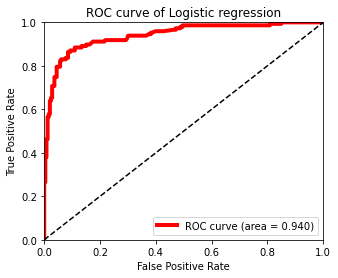

In [203]:
# AUC (Area Under the Curve)를 계산하여 출력합니다.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve를 그래프로 출력합니다.
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

In [204]:
from sklearn.model_selection import KFold

# K-fold 교차 검증의 k를 5로 설정합니다.
k = 5
cv = KFold(k, shuffle=True, random_state=0)
acc_history = []

# K-fold를 5번의 분할 학습으로 반복합니다.
for i, (train_data_row, test_data_row) in enumerate(cv.split(whole_df_encoded)):

    # 5개로 분할된 fold 중 4개를 학습 데이터셋, 1개를 테스트 데이터셋으로 지정합니다. 매 반복시마다, 테스트 데이터셋은 변경됩니다.
    df_train = whole_df_encoded.iloc[train_data_row]
    df_test = whole_df_encoded.iloc[test_data_row]
    
    # survived 피처를 y, 나머지 피처들을 x 데이터로 지정합니다.
    splited_x_train, splited_y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
    splited_x_test, splited_y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values
    
    # 주어진 데이터로 로지스틱 회귀 모델을 학습합니다.
    lr = LogisticRegression(random_state=0)
    lr.fit(splited_x_train, splited_y_train)
    y_pred = lr.predict(splited_x_test)
    
    # 테스트 데이터셋의 Accuracy를 계산하여 acc_history에 저장합니다.
    splited_acc = accuracy_score(splited_y_test, y_pred)
    acc_history.append(splited_acc)

In [205]:
acc_history

[0.8664122137404581,
 0.8816793893129771,
 0.8931297709923665,
 0.8740458015267175,
 0.89272030651341]

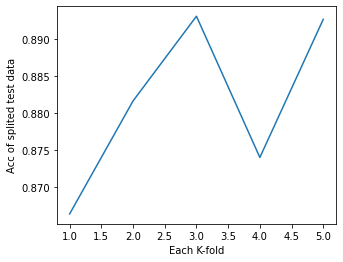

In [206]:
# acc_history에 저장된 5번의 학습 결과(Accuracy)를 그래프로 출력합니다.
plt.xlabel("Each K-fold")
plt.ylabel("Acc of splited test data")
plt.plot(range(1, k+1), acc_history)

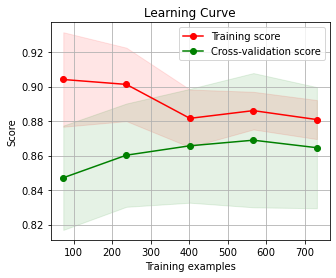

In [207]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lr, x_train, y_train)
plt.show()

In [208]:
# 의사결정나무를 학습하고, 학습한 모델로 테스트 데이터셋에 대한 예측값을 반환합니다.
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
y_pred_probability = dtc.predict_proba(x_test)[:,1]

In [209]:
# 학습한 모델의 성능을 계산하여 출력합니다.
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.87
Precision : 0.859
Recall : 0.789
F1 : 0.823


AUC : 0.864


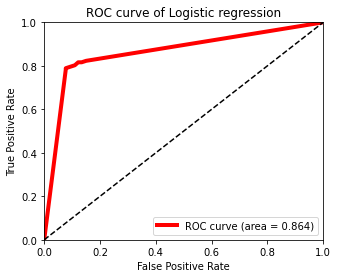

In [210]:
# 학습한 모델의 AUC를 계산하여 출력합니다.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve를 그래프로 출력합니다.
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

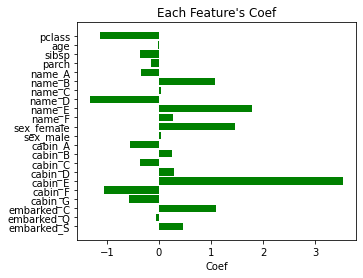

In [214]:
# 예측 대상인 survived 피처를 제외한 모든 피처를 리스트로 반환합니다. (그래프의 y축)
cols = df_train.columns.tolist()
cols.remove('survived')
y_pos = np.arange(len(cols))

# 각 피처별 회귀 분석 계수를 그래프의 x축으로 하여, 피처 영향력 그래프를 출력합니다.
plt.rcParams['figure.figsize'] = [5, 4]
fig, ax = plt.subplots()
ax.barh(y_pos, lr.coef_[0], align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(cols)
ax.invert_yaxis()
ax.set_xlabel('Coef')
ax.set_title("Each Feature's Coef")

plt.show()